<a href="https://colab.research.google.com/github/zeel2321-lit/Stock_Price_Prediction_/blob/main/LinearRegression_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/RELIANCE.NS (1).csv")

In [ ]:
print(df.head())
print('\n Shape of the data:')
print(df.shape)

         Date        Open        High         Low       Close   Adj Close  \
0  2017-04-03  664.699341  683.768555  662.247559  680.871033  663.438965   
1  2017-04-05  691.049561  702.342468  683.570435  700.856567  682.912842   
2  2017-04-06  697.884766  717.647400  694.516663  712.496277  694.254578   
3  2017-04-07  703.976990  710.267395  694.690063  696.696045  678.858887   
4  2017-04-10  698.380066  705.760071  682.183594  684.189575  666.672546   

     Volume  
0  20715169  
1  18609462  
2  23361514  
3  14710432  
4  14199616  

 Shape of the data:
(1237, 7)


In [ ]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

In [ ]:

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

In [ ]:

# shapes of training set
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(987, 2)


In [ ]:
# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of validation set:
(250, 2)


In [ ]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0, valid.shape[0]):
    a = train['Close'][len(train) - 248 + i:].sum() + sum(preds)
    b = a / 248
    preds.append(b)

In [ ]:
# checking the results (RMSE value)
rms = np.sqrt(np.mean(np.power((np.array(valid['Close']) - preds), 2)))
print('\n RMSE value on validation set:')
print(rms)



 RMSE value on validation set:
357.0938250268828


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


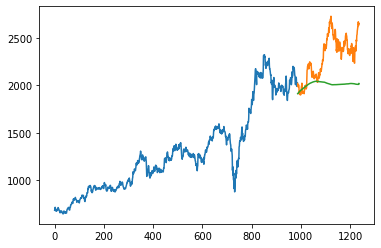

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

The RMSE value is close to 358 but the results are not very promising (as you can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease).

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

In [ ]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


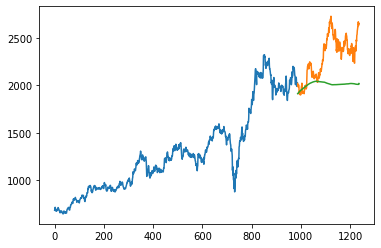

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

One problem in using regression algorithms is that the model overfits to the date and month column. Instead of taking into account the previous values from the point of prediction, the model will consider the value from the same date a month ago, or the same date/month a year ago.